In [41]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import seaborn as sns

df= pd.read_csv("CC GENERAL.csv")


#Data Preprocessing
df.isnull().sum() #we have missing values

df.fillna(value=df['MINIMUM_PAYMENTS'].mean(), inplace=True) #replace missing values with the column's mean
df=df.drop("CUST_ID", axis=1)  #droping this column as it won't help us

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


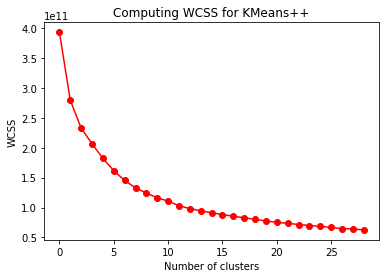

In [42]:
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( df )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
model=AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete') #n=8 from the WCSS and elbow method
clust_labels=model.fit_predict(df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()


1    8866
3      30
2      20
5      19
0       7
6       5
4       2
7       1
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

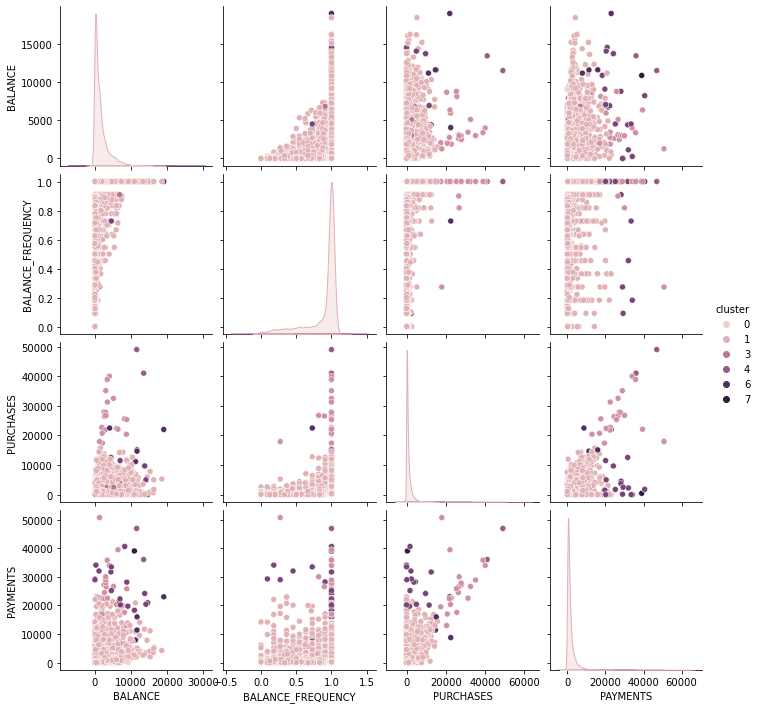

In [49]:
cols=['BALANCE','BALANCE_FREQUENCY','PURCHASES','PAYMENTS','cluster']
df['cluster']=agglomerative
df
sns.pairplot( df[cols],hue='cluster')

Some of these plots are'nt very useful, let's remove some

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

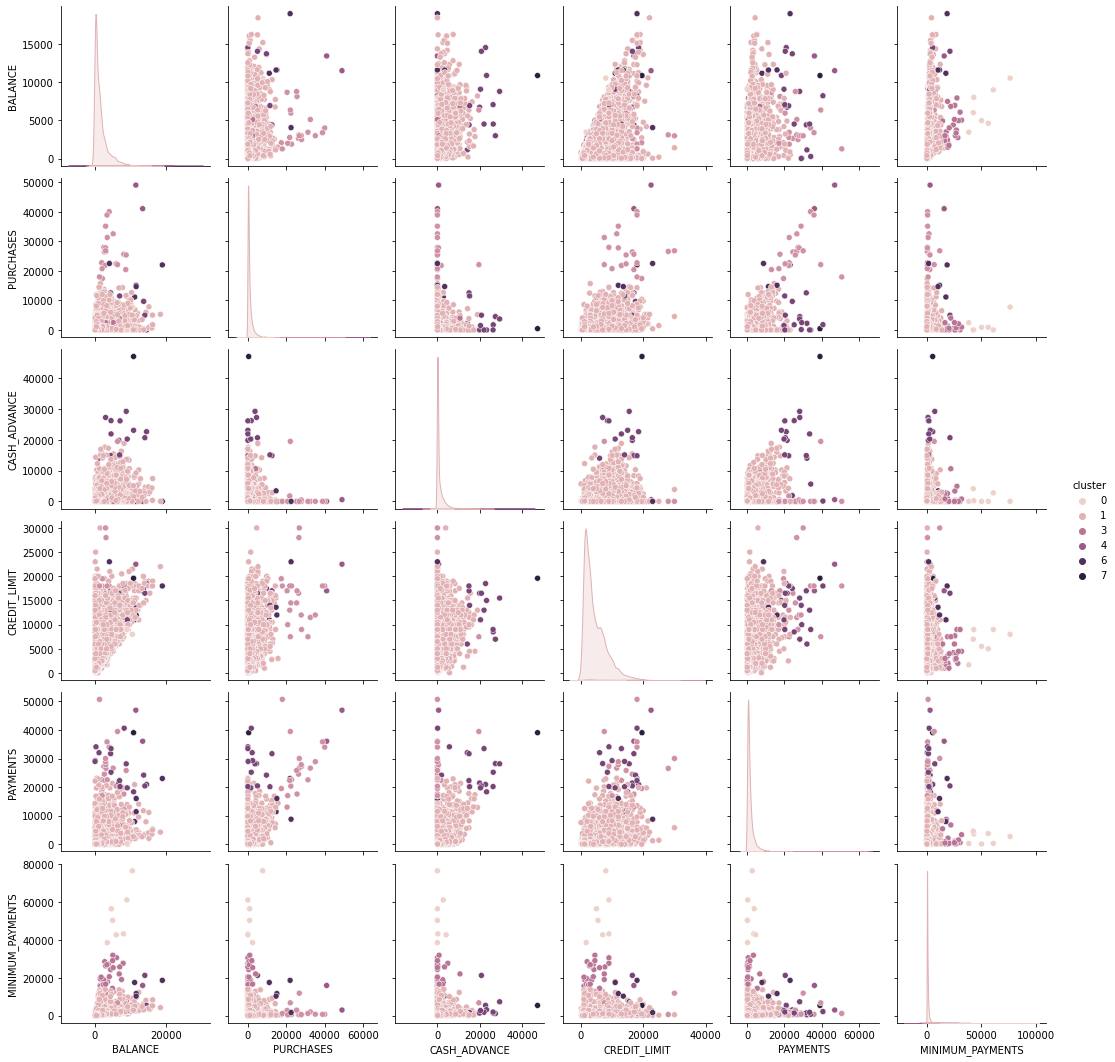

In [54]:
selected_cols =["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS",'cluster']
sns.pairplot( df[selected_cols],hue='cluster')

Most of  the plots doesn't look as expected as cluster 1 has 98.9% of the data, the following can be considered better than the others


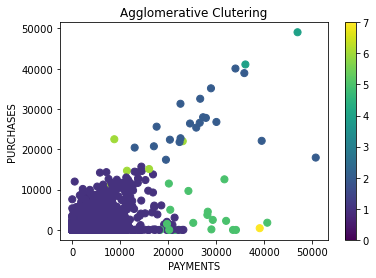

In [55]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['PAYMENTS'] , df ["PURCHASES"],c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PAYMENTS")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

In [ ]:
plt.figure(figsize=(10,10)
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))